In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import itertools

filename= 'estadistica1311.pkl'
with open(filename, 'rb') as fp:
    estadistica = pickle.load(fp)

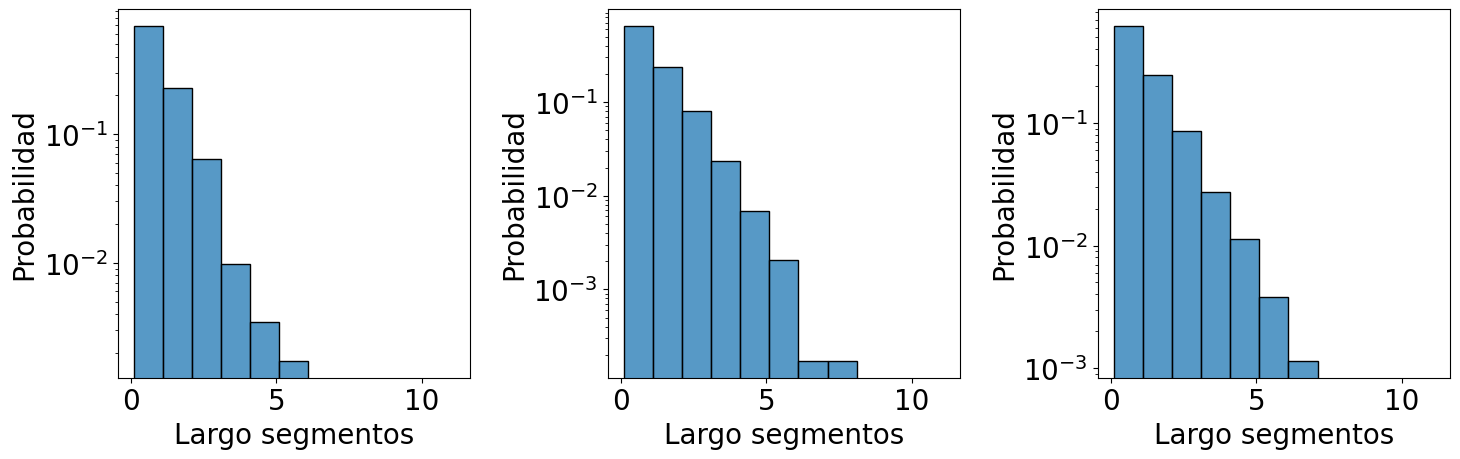

In [34]:
import seaborn as sns
# Crear una figura con 1 fila y 3 columnas
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila, 3 columnas

# Definir las etiquetas que quieres en la esquina superior derecha
labels = [r'$L_0$', r'$2 L_0$', r'$4 L_0$']

plt.rcParams.update({'font.size': 20})

for i in range(3):
    # Aplanar la lista de los datos para el histograma
    data = list(itertools.chain(*estadistica[0][i]))
    
    bins=np.arange(0.1, 12, 1)
    # Dibujar el histograma en el subgráfico correspondiente
    sns.histplot(data, bins=bins, stat='probability',ax=axs[i])
    
    # Configurar la escala logarítmica en el eje Y
    axs[i].set_yscale("log")
    
    # Etiquetas de los ejes
    axs[i].set_xlabel("Largo segmentos")
    axs[i].set_ylabel("Probabilidad")
    
    # Estilizar la etiqueta en la esquina superior derecha con un fondo y borde
    # axs[i].annotate(labels[i], 
    #                 xy=(0.95, 0.95), 
    #                 xycoords='axes fraction', 
    #                 ha='right', 
    #                 va='top', 
    #                 fontsize=14, 
    #                 fontweight='bold', 
    #                 color='white', 
    #                 bbox=dict(facecolor='brown', edgecolor='white', boxstyle="round,pad=0.3"))
    

#fig.text(0.5, 0.98, 'Comparación de histogramas para $r_a = 0.9$ y $r_s = 0.1$', ha='center', va='top', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig("histogramas_1_0_estadistica.svg",format='svg', dpi=300, bbox_inches='tight', transparent=True)
#fig.title('Para $r_a = 0.9$ y $r_s = 0.1$')



In [14]:
import funciones_new1510 as fn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import networkx as nx
import pickle


ind_activo = [0]
ang = np.pi/3

opt1 = np.array([np.cos(0*ang),np.sin(0*ang)])


std = 1
#------------------------------------------------

positions_list = np.array([0*opt1])
edgelist = [[0]]
N_part = 1
t_vida = np.ones(len(positions_list))
t_crit = 8
t_final = 20

i=4

L0=6
# Tamaño sistema
bordes = (i*L0, i*L0)

# Tamaño máximo del sistema

N_max = (i*L0)**2 + (3/2) * (i*L0) + 1

# Inicialmente 

N_a = N_part
N_s = 0


# Condiciones

r_a = 0.9
r_s = 0.1
while N_part/N_max<0.99999999999:
    
    
    #----------------SELECCION DE PROCESO---------------------------------

    #------ Gillespie------------
    alpha_1 = r_a*N_a
    alpha_2 = r_s*N_s 
    alpha = alpha_1 + alpha_2

    p = alpha_1/alpha
    
    # Seleccion de numeros aleatorios
    
    u1 = np.random.rand()
    u2 = np.random.rand()

    # Seleccion de tiempo (gillespie)
    t_jump = 1/alpha * np.log(1-u2)
    
    if u1 < p:

        #-----------------PROCESO DE CRECIMIENTO------------------------------
        ##################----------------------###########################
        a = fn.move(positions_list, ind_activo, edgelist, std, bordes)
        positions_list = a
        b = fn.check_vecinos(positions_list, edgelist, std, bordes)
        ind_activo = b
        N_part = N_part + 1
        t_vida_el = 0
        t_vida = np.append(t_vida, t_vida_el)
        t_vida = t_vida - t_jump
    
    elif u1<1:
        #-------------------PROCESO DE MUERTE---------------------------------
        ##################----------------------############################
        a = fn.kill(propensas, positions_list, t_vida, edgelist)
        positions_list = a
        b = fn.check_vecinos(positions_list, edgelist, std, bordes)
        ind_activo = b
        
        N_part = N_part - 1
        t_vida = t_vida - t_jump

    
    
    G = nx.DiGraph()
    G.add_edges_from([x for x in edgelist[1:] if isinstance(x, list)])
    
    puntas = {n for n, d in G.degree() if d == 1}
    

    propensas = []
    for terminal in puntas:
        if t_vida[terminal] <= t_crit:
            propensas.append(terminal)

    propensas = [x for x in propensas if x not in ind_activo]
    N_a = len(ind_activo)
    N_s = len(propensas)

/var/folders/wl/57dgndyn6cx8gs59k8z5t2h00000gn/T/ipykernel_1781/2197235012.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot(x_values, y_values, 'k-',color='black')


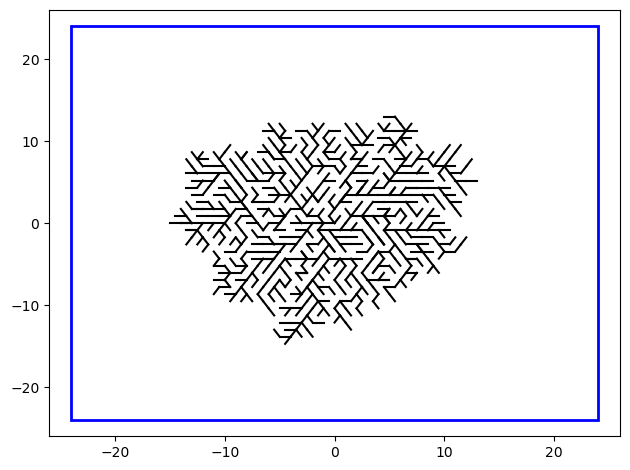

In [15]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()
ax.set_xlim(-4*L0-2, 4*L0+2)
ax.set_ylim(-4*L0-2, 4*L0+2)


#ax.scatter(positions_list[0,0], positions_list[0,1],color='red', s=1)
#ax.scatter(positions_list[1:,0], positions_list[1:,1],color='black', s=1)
#ax.scatter(positions_list[ind_activo, 0], positions_list[ind_activo, 1], color='red', s=1)
for j in range(1, len(edgelist)):
        if isinstance(edgelist[j], list):
            idxanterior = edgelist[j][0]
            idxsiguiente = edgelist[j][1]

            x_values = [positions_list[idxanterior][0], positions_list[idxsiguiente][0]]
            y_values = [positions_list[idxanterior][1], positions_list[idxsiguiente][1]]
        ax.plot(x_values, y_values, 'k-',color='black')

    # Crear un rectángulo centrado en (0, 0) con dimensiones proporcionadas por 'bordes'
color_exotico = 'blue'  # Color basado en el frame
rect = Rectangle(
    (-bordes[0], -bordes[1]),  # Esquina inferior izquierda
    2 * bordes[0], 2 * bordes[1],  # Ancho y alto (simétricos)
    linewidth=2, edgecolor=color_exotico, facecolor='none'
)
ax.add_patch(rect)
plt.tight_layout()

plt.savefig('cuadrado' + str(i) + 'lo.svg', format='svg', transparent=True, dpi=300)